In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import argparse
from gensim.models import fasttext
import io
import datetime

In [7]:
dlg_list = []
with io.open("data/textandembedding/allmorptok_inputtextfile.txt", encoding='euc-kr', mode='r') as f:
    for a in f:
        dlg_list.append(a.strip().split('\t'))
dlg_list = pd.DataFrame(dlg_list,columns=["dlg","check"])

In [15]:
max = 0
max_idx = 0
for idx, text1 in enumerate(dlg_list["dlg"]):
    if max < len(text1):
        max = len(text1)
        max_idx = idx
print(max)
print(max_idx)

2206
8951


In [16]:
print(dlg_list["dlg"][8951])

안녕 하 세요 코디 봇 입니다 무엇 을 도와 드릴까요 서당 에 서예 체험 하 러 가요 서예 할 때 입 기 편한 옷 을 추천 해 주 세요 네 잠시 만 기다려 주 세요 무릎 을 꿇 어야 할 수 도 있 으니 바지 가 좋 겠 어요 네 바지 로 구성 해 볼게요 면 으로 만들 어 진 톤 다운 된 그레이 컬러 로 단정 하 고 차분 한 느낌 을 주 는 바지 를 활용 한 코디 입니다 전체 적 으로 차분 한 느낌 을 강조 하 였 습니다 어떠신가요 차분 한 느낌 은 좋 은데요 바지 의 소재 가 뭔지 알 수 있 을까요 지금 보 기 에 는 주름 이 잘 생길 거 같 아요 면 100 % 입니다 음 그럼 괜찮 을 거 같 네요 바지 는 면 이 라 편할 거 같 으니 기본 적 으로 두 고 아우 터 와 상의 를 좀 더 봄 느낌 에 맞 는 옷 이 었 으면 해요 지금 은 너무 칙칙 해 보이 네요 네 잠시 만 기다려 주 세요 카멜 색상 의 밝 은 아우 터 와 캐주얼 한 면 티 로 변경 해 보 았 습니다 어떠신가요 음 아 우터 랑 상의 가 바지 와 는 안 어울려 보이 네요 바지 와 좀 더 어울리 는 아이템 을 보여 주 세요 네 두 아이템 을 모두 변경 해드릴까요 네 아우 터 와 상 의 모두 변경 해 주 세요 네 잠시 만 기다려 주 세요 깔끔 하 면서 단정 한 느낌 을 주 는 가디건 과 스퀘어 네크라인 의 브라운 티셔츠 로 변경 해 보 았 습니다 어떠신가요 아우 터 가 포근 하 고 단정 한 느낌 을 줘서 마음 에 드 네요 상의 는 바지 하 고 아우 터 와 같이 입 었 을 때 색깔 이 안 어울릴 거 같 네요 다른 옷 으로 추천 해 주 세요 네 원 하 시 는 색상 이 있 으신 가요 음 바지 와 어울릴 만 한 색깔 은 무채색 계열 이 좋 겠 어요 아니면 하얀색 이 깔끔 해 보일 수 있 겠 네요 네 잠시 만 기다려 주 세요 여성 스러워 보이 는 밝 은 아이보리 색 의 쉬 폰 티 입니다 소매 끝 리본 장식 이 포인트 에 요 어떠신가요 음 소재 가 아우 터 하 고 어울릴 거 같 지 않 네요 다른 소재 로 보여 주 

In [ ]:
dlg_list['sentence'] = dlg_list["dlg"].apply(lambda x : len(x.split()))

In [10]:
dlg_list['sentence'].max()

822

C:\Users\tlsgh\anaconda3\envs\fashionhow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


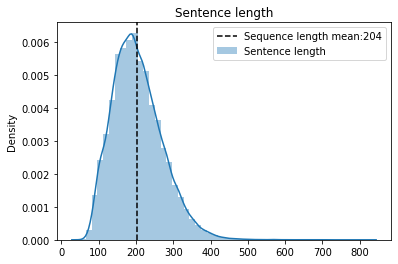

가장 긴 문장 내 단어의 수 : 822
가장 짧은 문장 내 단어의 수 : 50
평균 문장 내 단어의 수 : 204


In [11]:
def plot_sentence_length(data):
    mean_seq_len = np.round(data['sentence'].mean()).astype(int)
    sns.distplot(tuple(data['sentence']), hist=True, kde=True, label='Sentence length')
    plt.axvline(x=mean_seq_len, color='k', linestyle='--', label=f'Sequence length mean:{mean_seq_len}')
    plt.title('Sentence length')
    plt.legend()
    plt.show()
    print(f"가장 긴 문장 내 단어의 수 : {data['sentence'].max()}")
    print(f"가장 짧은 문장 내 단어의 수 : {data['sentence'].min()}")
    print(f"평균 문장 내 단어의 수 : {mean_seq_len}")

plot_sentence_length(dlg_list)

In [6]:
X = dlg_list["dlg"]
y = pd.to_numeric(dlg_list["check"])

In [7]:
dlg_list[:10]
X[:10]

0    어서 오 세요 코디 봇 입니다 무엇 을 도와 드릴까요 처음 대학교 들어가 는 데 입...
1    어서 오 세요 코디 봇 입니다 무엇 을 도와 드릴까요 처음 대학교 들어가 는 데 입...
2    어서 오 세요 코디 봇 입니다 무엇 을 도와 드릴까요 처음 대학교 들어가 는 데 입...
3    어서 오 세요 코디 봇 입니다 무엇 을 도와 드릴까요 처음 대학교 들어가 는 데 입...
4    어서 오 세요 코디 봇 입니다 무엇 을 도와 드릴까요 처음 대학교 들어가 는 데 입...
5    어서 오 세요 코디 봇 입니다 무엇 을 도와 드릴까요 처음 대학교 들어가 는 데 입...
6    어서 오 세요 코디 봇 입니다 무엇 을 도와 드릴까요 처음 대학교 들어가 는 데 입...
7    어서 오 세요 코디 봇 입니다 무엇 을 도와 드릴까요 처음 대학교 들어가 는 데 입...
8    어서 오 세요 코디 봇 입니다 무엇 을 도와 드릴까요 처음 대학교 들어가 는 데 입...
9    어서 오 세요 코디 봇 입니다 무엇 을 도와 드릴까요 처음 대학교 들어가 는 데 입...
Name: dlg, dtype: object

In [8]:
fl = 1000
t = Tokenizer(num_words=fl+1)
t.fit_on_texts(X)
vocab_size = len(t.word_index) + 1

In [9]:
print(vocab_size)

7239


In [10]:
dlg_sequence = t.texts_to_sequences(X)
print(len(dlg_sequence))

61234


In [11]:
max_len = max(len(l) for l in dlg_sequence)
print(max_len)

762


In [12]:
dlg_padding= pad_sequences(dlg_sequence,padding='post',maxlen=max_len)
print(dlg_padding[:10])

[[133  75   3 ...   0   0   0]
 [133  75   3 ...   0   0   0]
 [133  75   3 ...   0   0   0]
 ...
 [133  75   3 ...   0   0   0]
 [133  75   3 ...   0   0   0]
 [133  75   3 ...   0   0   0]]


In [13]:
print(f"== LOAD fasttext START at {datetime.datetime.now()}")
ft = fasttext.load_facebook_model("data/textandembedding/cc.ko.300.bin")
print(f"== LOAD fasttext   END at {datetime.datetime.now()}")

== LOAD fasttext START at 2021-09-01 17:01:11.551088
== LOAD fasttext   END at 2021-09-01 17:02:55.347680


In [14]:
embedding_dim=300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

In [15]:
ft.wv["<OOV>"]

array([-6.54214108e-03, -7.56616471e-03,  7.70846615e-03, -9.05489828e-03,
        7.67194666e-03, -1.52929814e-03,  5.17068151e-03,  1.20648826e-02,
       -4.53215139e-03,  1.15391081e-02,  2.44196365e-03, -2.32876022e-03,
        3.91044043e-04, -7.33211823e-03, -1.76302611e-03,  7.53582222e-03,
        9.51858144e-03,  1.33824060e-02, -1.27239497e-02,  5.16738323e-03,
       -2.23919447e-03, -5.59783913e-03, -8.22756346e-03,  1.26554864e-02,
       -4.43653623e-03,  5.37651666e-02,  6.34058705e-03,  2.70937872e-03,
       -1.98347066e-02,  2.87783943e-04,  7.40830740e-03,  1.08837299e-02,
        4.48352750e-03, -2.14772839e-02,  5.72171435e-03,  3.79122496e-02,
       -1.47992047e-02,  7.54602766e-03, -1.30680129e-02, -5.44041104e-04,
       -4.33749892e-03, -1.93862896e-02, -6.43471815e-03, -1.23484768e-02,
        1.85693055e-02, -2.43177917e-03,  1.83054013e-04, -7.36260042e-03,
        1.66769326e-02, -1.86709745e-03, -7.61663029e-03,  1.25203719e-02,
       -4.88790497e-03, -

In [16]:
print(embedding_matrix[13])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
for word, i in t.word_index.items(): # 훈련 데이터의 단어 집합에서 단어와 정수 인덱스를 1개씩 꺼내온다.
    temp = ft.wv[word] # 단어(key) 해당되는 임베딩 벡터의 값(value)를 temp에 저장
    if temp is not None: # 만약 temp가 None이 아니라면 임베딩 벡터의 값을 리턴받은 것이므로
        embedding_matrix[i] = temp # embedding_matrix의 해당 단어 위치의 행에 벡터의 값을 저장한다.

In [18]:
embedding_matrix[1]

array([ 4.89382781e-02, -1.73490774e-02, -1.08951427e-01,  1.26801476e-01,
        6.52566031e-02,  2.43210942e-01,  1.18720911e-01,  7.12593570e-02,
       -5.76393753e-02, -6.75969273e-02, -1.98910944e-02,  4.02295589e-02,
       -4.10502180e-02, -1.09803274e-01,  5.78368548e-03, -1.50344186e-02,
        3.29012722e-02, -1.03318825e-01,  8.21772367e-02, -8.73394981e-02,
        2.62525119e-02, -1.23591252e-01, -2.90258396e-02,  3.89796868e-03,
       -6.56969473e-02,  4.69460934e-01,  4.97056097e-02,  6.38224930e-02,
        9.24233273e-02, -5.40442169e-02, -1.72629412e-02, -1.25243828e-01,
       -3.66453975e-02,  1.38018057e-01, -1.22470185e-01, -1.17100207e-02,
        1.19671216e-02,  1.33716818e-02,  2.18556076e-02,  5.87066077e-03,
        5.04442165e-03,  5.47819324e-02, -1.45379886e-01,  5.61977364e-02,
        4.26588431e-02,  4.41179276e-02, -1.07390299e-01,  6.62875772e-02,
        5.63718639e-02, -2.37071402e-02, -3.51297632e-02,  1.93061959e-02,
        2.24167411e-03,  

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)



In [1]:
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_len),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_bilstm.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
history = model_bilstm.fit(dlg_padding, y,
                epochs=10,validation_split=0.2,
                batch_size=8,use_multiprocessing=True,callbacks=early_stop)


NameError: name 'tf' is not defined

In [26]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1929654702046704181,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12018909857476404327
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6918604064
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1811201017180677678
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:09:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7310982709101044615
 physical_device_desc: "device: XLA_GPU device"]

In [3]:
import tensorflow as tf
tf.test.is_built_with_cuda()

True

In [4]:
tf.__version__


'2.3.0'

In [27]:
import tensorflow as tf
tf.test.is_gpu_available( cuda_only=False, min_cuda_compute_capability=None )



True

In [28]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14280220399292160498
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16406887856951587258
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6918604064
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4697821684733195425
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:09:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 16012728856588518054
physical_device_desc: "device: XLA_GPU device"
]


In [29]:
import tensorflow as tf

tf.debugging.set_log_device_placement(True)

# 텐서 생성
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
